In [17]:
import os

from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [18]:
def comp_area(ton,gray):
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    gray[gray!=0] = 1
    con =len(np.flatnonzero(ton))
    mask = cv2.dilate(gray,element)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    len_contour = len(contours)
    contour_list = []
    for i in range(len_contour):
        drawing = np.zeros_like(mask, np.uint8)  # create a black image
        img_contour = cv2.drawContours(drawing, contours, i, (255, 255, 255), -1)
        contour_list.append(img_contour)
 
    out = sum(contour_list)
    area_con = len(np.flatnonzero(out))/con
    return area_con

In [19]:
def sep(img, mask):
    mask1 = mask.reshape((-1, 1))
    mask1[mask1 != 0] = 1
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    a = lab[:, :, 1].astype(np.float32)

    a = a.reshape((-1, 1))
    z = a * mask1
    idx = np.flatnonzero(z)
    a = pd.DataFrame(z).replace(0, np.NAN)
    a.dropna(inplace=True)
    a = np.float32(a)
    criteria = (cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    ret, label, center = cv2.kmeans(a, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    # label = label.reshape((mask.shape))

    cmax = np.min(center)
    res = center[label.flatten()]
    res2 = np.zeros_like(mask1)
    res2[idx] = res
    res2[res2 != cmax] = 0
    res2[res2 == cmax] = 1
    res2 = res2.reshape((mask.shape))
    rat = comp_area(mask, res2)
    print(rat)
    coat = cv2.merge([res2, res2, res2])
    sub = 1 - coat

    coats = img * coat
    subs = img * sub
    return coats, subs

0.6612343014128729


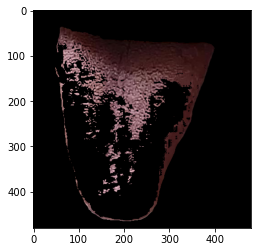

In [34]:
if __name__ == "__main__":
    # directory_name = '/home/thu-microe/桌面/our_tonguedata/corrected/seg'
    directory_name = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data3\category\0\20220511155349-1.png'

    # for filename in os.listdir(directory_name):
    #     print(os.path.join(directory_name, filename))
    #     img = cv2.imread(os.path.join(directory_name, filename))
    #     img_g = cv2.imread(os.path.join(directory_name, filename), 0)
    #     print(img)
    #     coat1, subs = sep(img, img_g)
    #     # cv2.imwrite(r'D:\MyCodes\pythonProject\datas\seg' + filename, coat1)
    #     # cv2.imwrite('/home/thu-microe/桌面/quant_new/coat/'+filename,coat1)
    #
    #     z, y, x = cv2.split(coat1)
    #     img_show = cv2.merge([x, y, z])
    #     plt.imshow(img_show)
    #     plt.title("separation "), plt.xticks([]), plt.yticks([])
    #     plt.show()
    img = cv2.imread(directory_name)
    img_g = cv2.imread(directory_name, 0)
    coat1, subs = sep(img, img_g)
    plt.imshow(coat1[:,:,::-1])